In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#function we'll use to start off with: 
def analysis_pol(score): 
  if score < 0: 
    return 'Neg'
  elif score ==0: 
    return 'Neu'
  elif score > 0: 
    return 'Pos'

def analysis_sub(score): 
  if score < 0: 
    return 'Factual'
  elif score == 0: 
    return 'Neutral'
  elif score > 0: 
    return 'Personal'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
covid = pd.read_csv('/content/drive/MyDrive/Thesis/Data/Filled Datasets/Second dataset (Kaggle)/Preprocessed/combined_train_val.csv')

In [5]:
covid.head(n=3)

,tweet,label
0,cdc currently reports deaths general discrepan...,0
1,states reported deaths small rise last tuesday...,0
2,politically correct woman almost uses pandemic...,1


**define fin_data: the final dataset we'll be using**

In [6]:
for i in range(len(covid)): 
  covid.iloc[i,0] = str(covid.iloc[i,0])

In [7]:
fin_data = pd.DataFrame(covid['tweet'])
len(fin_data)

8558

In [8]:
fin_data['Subjectivity_tweet'] = fin_data['tweet'].apply(getSubjectivity) 
fin_data['Analysis_sub_tweet'] = fin_data['Subjectivity_tweet'].apply(analysis_sub)
fin_data['Polarity_tweet'] = fin_data['tweet'].apply(getPolarity) 
fin_data['Analysis_pol_tweet'] = fin_data['Polarity_tweet'].apply(analysis_pol)
fin_data.head()

,tweet,Subjectivity_tweet,Analysis_sub_tweet,Polarity_tweet,Analysis_pol_tweet
0,cdc currently reports deaths general discrepan...,0.460000,Personal,-0.060000,Neg
1,states reported deaths small rise last tuesday...,0.155556,Personal,-0.083333,Neg
2,politically correct woman almost uses pandemic...,0.075000,Personal,-0.025000,Neg
3,testing laboratories india th august tests don...,0.000000,Neutral,0.000000,Neu
4,populous states generate large case counts loo...,0.461039,Personal,0.116883,Pos


In [10]:
fin_data['label'] = covid['label']
import os
os.chdir('/content/drive/MyDrive/Thesis/Food for thought /Sentiment Analysis/Covid19/')
fin_data.to_csv('covid_sentiment.csv')

**let's now visualize the insights this generates**

We'll start of with the distribution of polarity of tweets vs news, for both classes. 

In [ ]:
real_df = fin_data[fin_data['label']==0]
print(real_df.label)
fake_df = fin_data[fin_data['label']==1]
print(fake_df.label)

0       0
1       0
3       0
4       0
5       0
       ..
2133    0
2135    0
2137    0
2138    0
2139    0
Name: label, Length: 5600, dtype: int64
2       1
7       1
8       1
9       1
11      1
       ..
2121    1
2123    1
2128    1
2134    1
2136    1
Name: label, Length: 5098, dtype: int64


In [ ]:
#polarity 
real_tweet_polarity = real_df['Analysis_pol_tweet']
fake_tweet_polarity = fake_df['Analysis_pol_tweet']

#subjectivity 
real_tweet_subjectivity = real_df['Analysis_sub_tweet']
fake_tweet_subjectivity = fake_df['Analysis_sub_tweet']


In [ ]:
real_tweet_polarity

0       Neg
1       Neg
3       Neu
4       Pos
5       Neg
       ... 
2133    Neu
2135    Pos
2137    Pos
2138    Neu
2139    Neu
Name: Analysis_pol_tweet, Length: 5600, dtype: object

**plotting polarity**

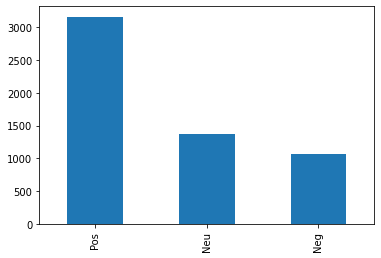

In [ ]:
real_tweet_polarity.value_counts().plot(kind='bar')


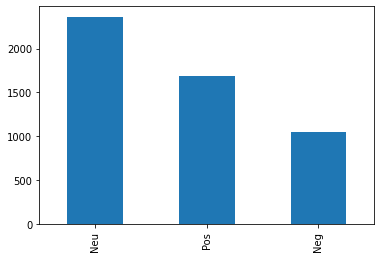

In [ ]:
fake_tweet_polarity.value_counts().plot(kind='bar')


**plotting subjectivity**

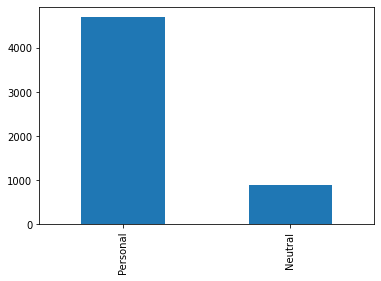

In [ ]:
real_tweet_subjectivity.value_counts().plot(kind='bar') #no factual tweets, makes sense ofc 


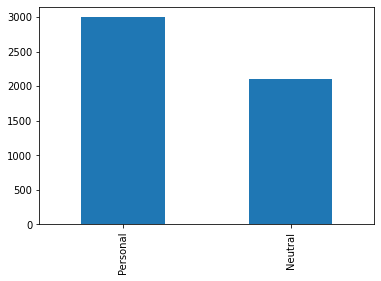

In [ ]:
fake_tweet_subjectivity.value_counts().plot(kind='bar')

**let's go for higher granularities**

In [ ]:
#function we'll use to start off with: 
def analysis_pol_gran(score): 
  if score < -0.5: 
    return 'Negative'
  elif score < 0 and score > -0.5: 
    return 'Semi-Negative'
  elif score ==0: 
    return 'Neutral'
  elif score > 0 and score < 0.5: 
    return 'Semi-Positive'
  elif score > 0.5: 
    return 'Positive'

def analysis_sub_gran(score): 
  if score < -0.5: 
    return 'Factual'
  elif score < 0 and score > -0.5: 
    return 'Semi-Factual'
  elif score ==0: 
    return 'Neutral'
  elif score > 0 and score < 0.5: 
    return 'Semi-Personal'
  elif score > 0.5: 
    return 'Personal'

In [ ]:
fin_data_gran = pd.DataFrame(covid[['tweet','label']])
len(fin_data_gran)

10698

In [ ]:
fin_data_gran['Subjectivity_tweet'] = fin_data_gran['tweet'].apply(getSubjectivity) 
fin_data_gran['Analysis_sub_tweet'] = fin_data_gran['Subjectivity_tweet'].apply(analysis_sub_gran)
fin_data_gran['Polarity_tweet'] = fin_data_gran['tweet'].apply(getPolarity) 
fin_data_gran['Analysis_pol_tweet'] = fin_data_gran['Polarity_tweet'].apply(analysis_pol_gran)

In [ ]:
real_df_gran = fin_data_gran[fin_data_gran['label']==0]
fake_df_gran = fin_data_gran[fin_data_gran['label']==1]


In [ ]:
#polarity 
real_tweet_polarity_gran = real_df_gran['Analysis_pol_tweet']
fake_tweet_polarity_gran = fake_df_gran['Analysis_pol_tweet']

#subjectivity 
real_tweet_subjectivity_gran = real_df_gran['Analysis_sub_tweet']
fake_tweet_subjectivity_gran = fake_df_gran['Analysis_sub_tweet']


**plotting granular polarity**

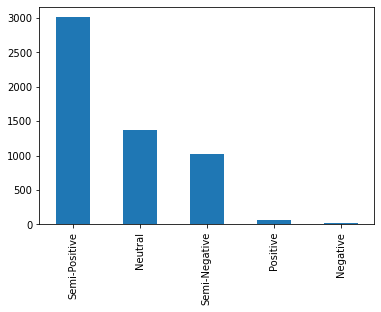

In [ ]:
real_tweet_polarity_gran.value_counts().plot(kind='bar')


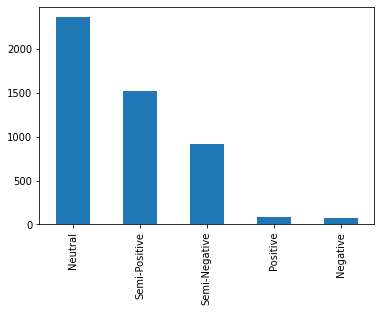

In [ ]:
fake_tweet_polarity_gran.value_counts().plot(kind='bar')


**plotting granular subjectivity**

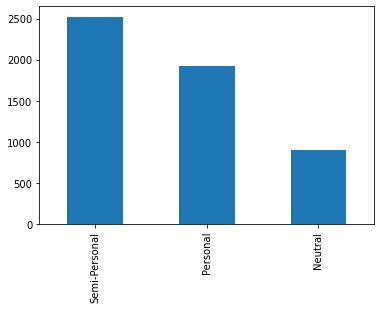

In [ ]:
real_tweet_subjectivity_gran.value_counts().plot(kind='bar') #no factual tweets, makes sense ofc 


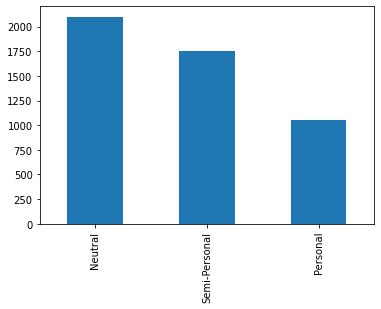

In [ ]:
fake_tweet_subjectivity_gran.value_counts().plot(kind='bar')

**let's visualize tweets from the different polarity classes**

In [ ]:
print(real_df_gran.head(n=5))
print(fake_df_gran.head(n=5))

                                               tweet  label  \
0  cdc currently reports deaths general discrepan...      0   
1  states reported deaths small rise last tuesday...      0   
3  testing laboratories india th august tests don...      0   
4  populous states generate large case counts loo...      0   
5  covid act found average person illinois covid ...      0   

   Subjectivity_tweet Analysis_sub_tweet  Polarity_tweet Analysis_pol_tweet  
0            0.460000      Semi-Personal       -0.060000      Semi-Negative  
1            0.155556      Semi-Personal       -0.083333      Semi-Negative  
3            0.000000            Neutral        0.000000            Neutral  
4            0.461039      Semi-Personal        0.116883      Semi-Positive  
5            0.400000      Semi-Personal       -0.150000      Semi-Negative  
                                                tweet  label  \
2   politically correct woman almost uses pandemic...      1   
7   obama calls trumps co

In [ ]:
real_df_gran.head(n=5)

,tweet,label,Subjectivity_tweet,Analysis_sub_tweet,Polarity_tweet,Analysis_pol_tweet
0,cdc currently reports deaths general discrepan...,0,0.460000,Semi-Personal,-0.060000,Semi-Negative
1,states reported deaths small rise last tuesday...,0,0.155556,Semi-Personal,-0.083333,Semi-Negative
3,testing laboratories india th august tests don...,0,0.000000,Neutral,0.000000,Neutral
4,populous states generate large case counts loo...,0,0.461039,Semi-Personal,0.116883,Semi-Positive
5,covid act found average person illinois covid ...,0,0.400000,Semi-Personal,-0.150000,Semi-Negative


In [ ]:
fake_df_gran.head(n=5)

,tweet,label,Subjectivity_tweet,Analysis_sub_tweet,Polarity_tweet,Analysis_pol_tweet
2,politically correct woman almost uses pandemic...,1,0.075000,Semi-Personal,-0.025,Semi-Negative
7,obama calls trumps coronavirus response chaoti...,1,0.000000,Neutral,0.000,Neutral
8,clearly obama administration leave kind game p...,1,0.561111,Personal,0.100,Semi-Positive
9,retractionhydroxychloroquine chloroquine witho...,1,0.000000,Neutral,0.000,Neutral
11,nba poised restart month march reported utah j...,1,0.000000,Neutral,0.000,Neutral


In [ ]:
#define function to display tweet and news: 
def display_real(id): 
  print('tweet: ',real_df_gran.iloc[id,0])
  print('tweet polarity: ', real_df_gran.iloc[id,5])

def display_fake(id): 
  print('tweet: ',fake_df_gran.iloc[id,0])
  print('tweet polarity: ', fake_df_gran.iloc[id,5])

real class

In [ ]:
display_real(0)

tweet:  cdc currently reports deaths general discrepancies death counts different sources small applicable death toll stands roughly people today
tweet polarity:  Semi-Negative


In [ ]:
display_real(2)

tweet:  testing laboratories india th august tests done dg
tweet polarity:  Neutral


In [ ]:
display_real(4)

tweet:  covid act found average person illinois covid infecting people data shows infection growth rate declined time factors stay at home order restrictions put place
tweet polarity:  Semi-Negative


fake class

In [ ]:
display_fake(0)

tweet:  politically correct woman almost uses pandemic excuse reuse plastic bag
tweet polarity:  Semi-Negative


In [ ]:
display_fake(1)

tweet:  obama calls trumps coronavirus response chaotic disaster
tweet polarity:  Neutral


In [ ]:
display_fake(7)

tweet:  nobel prize laureate task onto n t say coronavirus natural post facebook claims fact professor onto said s greatly saddened name used spread misinformation latest
tweet polarity:  Semi-Positive
